In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.set_printoptions(edgeitems=2, threshold=50)

In [4]:
mnist_train = dset.MNIST("",train=True,transform=transforms.ToTensor(), target_transform=None, download=True) #train용으로 사용
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=False) #test용으로 사용

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


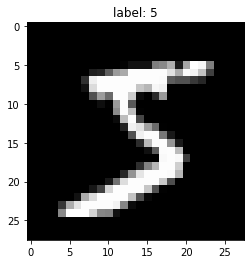

In [5]:
print('mnist_train 길이:', len(mnist_train))
print('mnist_test 길이:', len(mnist_test))

image, label = mnist_train.__getitem__(0)
print('image data 형태:',image.size())
print('label: ',label)

plt.title('label: %d' %label)
plt.imshow(image[0],cmap='gray')
plt.show()

In [6]:
batch_size = 1042 #batch_size 단위로 끊어서 학습
learning_rate = 0.01
epoch = 400

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True) #batch_size 만큼 나눌 때 나머지는 버린다)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

0
한 번에 로드되는 데이터 크기: 1042


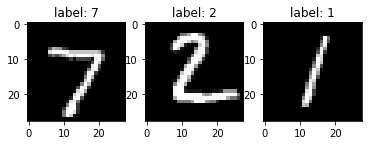

1
한 번에 로드되는 데이터 크기: 1042


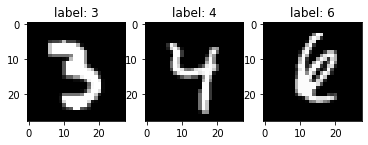

2
한 번에 로드되는 데이터 크기: 1042


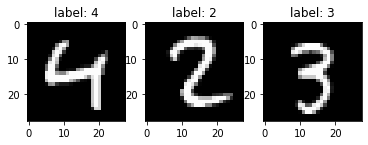

3
한 번에 로드되는 데이터 크기: 1042


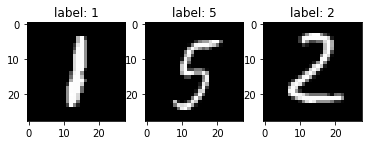

4
한 번에 로드되는 데이터 크기: 1042


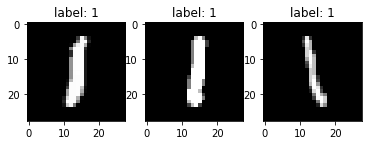

5
한 번에 로드되는 데이터 크기: 1042


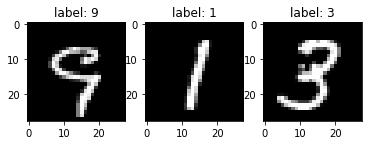

In [7]:
n = 3 #샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader):
    if i>5:
        break
    
    print('%d' %i)
    print('한 번에 로드되는 데이터 크기:',len(imgs))

    for j in range(n):
        img = imgs[j].squeeze()
        
        plt.subplot(1,n,j+1)
        plt.imshow(img,cmap='gray')
        plt.title('label: %d' %labels[j])

    plt.show()

In [22]:

model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128, 10),
)

model= model.cuda()

def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, label] in enumerate(dloader):
        label = Variable(label).cuda()

        imgs = imgs.view(-1, imgs.shape[2]*imgs.shape[3])
        imgs = Variable(imgs, requires_grad=False).cuda()

        output = imodel(imgs)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == label).sum().float()
    
    print('Accuracy of Test Data: {}'.format(100*correct/total))

In [23]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 11.303049087524414


In [24]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
for i in range(epoch):
    for j, [imgs, labels] in enumerate(train_loader):
        labels = Variable(labels).cuda()

        imgs = imgs.view(-1,imgs.shape[2]*imgs.shape[3])
        imgs = Variable(imgs, requires_grad=True).cuda()

        optimizer.zero_grad()
        output = model(imgs)
        loss = loss_func(output, labels)

        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    if i%50==0:
        print('%d..' %i)
        ComputeAccr(test_loader, model)
        print(loss)

0..
Accuracy of Test Data: 11.313713073730469
tensor(2.2962, device='cuda:0', grad_fn=<NllLossBackward>)
50..
Accuracy of Test Data: 80.20899963378906
tensor(0.7528, device='cuda:0', grad_fn=<NllLossBackward>)
100..
Accuracy of Test Data: 88.4197006225586
tensor(0.4251, device='cuda:0', grad_fn=<NllLossBackward>)
150..
Accuracy of Test Data: 90.00852966308594
tensor(0.3757, device='cuda:0', grad_fn=<NllLossBackward>)
200..
Accuracy of Test Data: 90.90424346923828
tensor(0.3375, device='cuda:0', grad_fn=<NllLossBackward>)
250..
Accuracy of Test Data: 91.3947525024414
tensor(0.3352, device='cuda:0', grad_fn=<NllLossBackward>)
300..
Accuracy of Test Data: 91.78929138183594
tensor(0.3203, device='cuda:0', grad_fn=<NllLossBackward>)
350..
Accuracy of Test Data: 92.0345458984375
tensor(0.2886, device='cuda:0', grad_fn=<NllLossBackward>)


In [26]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 92.05587005615234


In [27]:
netname = './nets/mnp_weight.pkl'
torch.save(model,netname)